In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data_bin = pd.read_csv('data/data_processed_bin.csv')

In [15]:
data_bin.head()

,age,label,sex,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
0,16.282192,0,0,94.5,1.65,34.710744,97.000000,20.790000,2.50000,5.568298,...,0.567,0.112,0.196,0.158,0.151,0.436,1.547,1.68,0.881664,0.226844
1,13.432877,0,1,67.0,1.60,26.171875,96.000000,19.100000,2.75000,2.571591,...,0.390,0.250,0.280,0.150,0.130,0.670,1.310,2.52,3.193548,0.161374
2,11.879452,0,1,70.0,1.56,28.763971,79.629032,18.726203,2.72443,0.683691,...,0.950,0.330,0.510,0.130,0.210,0.600,1.710,1.85,2.092457,0.222764
3,10.904110,0,0,62.0,1.45,29.488704,79.629032,18.726203,2.72443,0.683691,...,0.270,0.240,0.470,0.410,0.250,0.430,1.610,2.23,1.568849,0.243139
4,18.265753,0,1,79.5,1.72,26.872634,97.000000,21.640000,2.69000,1.945217,...,0.910,0.190,0.300,0.250,0.470,1.050,1.410,2.98,1.467967,0.170871


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

In [17]:
X = data_bin.drop(columns=['label'])
y = data_bin['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=71)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1.0, 30.0)

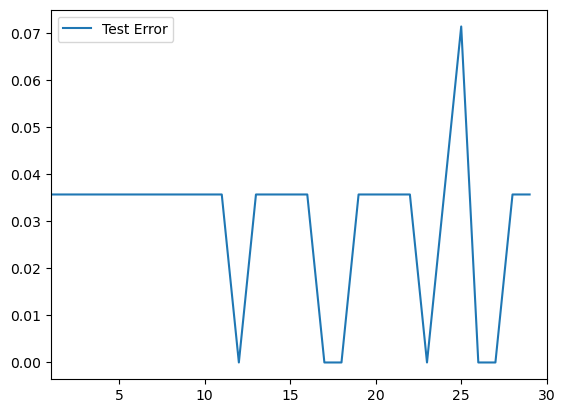

In [18]:
test_error = []

for n in range(1,30):
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
plt.plot(range(1,30),test_error,label='Test Error')
plt.legend()
plt.xlim((1,30))

In [22]:
rf_model = RandomForestClassifier(n_estimators=3,max_features='sqrt',random_state=71)
rf_model.fit(X_train,y_train)
preds = rf_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[ 7  0]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        21

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [20]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train,y_train)
preds = dt_model.predict(X_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[ 7  0]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.90      0.95        21

    accuracy                           0.93        28
   macro avg       0.89      0.95      0.91        28
weighted avg       0.94      0.93      0.93        28



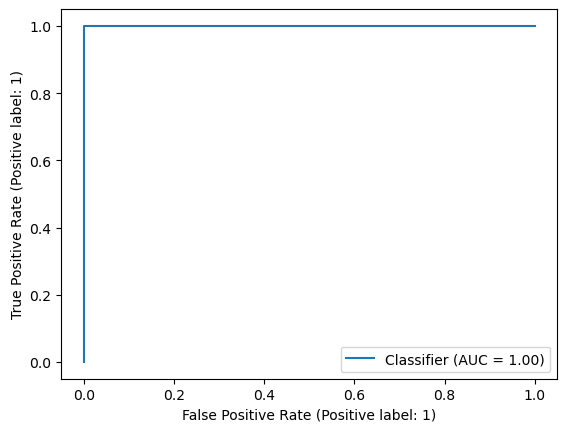

In [23]:
RocCurveDisplay.from_predictions(y_test, preds)

In [31]:
pd.DataFrame(index=X.columns,data=dt_model.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

,Feature Importance
ALT,0.835602
DGLA,0.065329
Płytki krwi,0.050311
C14:1,0.017209
beta-karoten,0.017115
...,...
HOMA IR,0.000000
glukoza 0,0.000000
insulina 0,0.000000
proinsulina,0.000000


In [1]:
print('lol1/')
print('giga dziwne')

lol1/
giga dziwne
